In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import numpy as np
import scipy as sp
# import the curve fitting module and standard imports
from scipy.optimize import curve_fit 

In [94]:
## import the data
bias = []
for i in range(1,11):
    bias.append(fits.getdata("bias_data/Abias000000{:02d}.fit".format(i) , ext=0).astype(np.int))
    
flatA_0 = []
for i in range(11,21):
    flatA_0.append(fits.getdata("flat_data/AflatField000000{:02d}.fit".format(i) , ext=0).astype(np.int))
    
flatA1_0 = []
for i in range(11,21):
    flatA1_0.append(fits.getdata("flat_data/a1flatField000000{:02d}.fit".format(i) , ext=0).astype(np.int))
    
flatK_0 = []
for i in range(11,21):
    flatK_0.append(fits.getdata("flat_data/KflatField000000{:02d}.fit".format(i) , ext=0).astype(np.int))
    
flatS_0 = []
for i in range(11,21):
    flatS_0.append(fits.getdata("flat_data/SflatField000000{:02d}.fit".format(i) , ext=0).astype(np.int))
    
flatT_0 = []
for i in range(11,21):
    flatT_0.append(fits.getdata("flat_data/TflatField000000{:02d}.fit".format(i) , ext=0).astype(np.int))
    
flatQ_0 = []
for i in range(11,21):
    flatT_0.append(fits.getdata("flat_data/QflatField000000{:02d}.fit".format(i) , ext=0).astype(np.int))

In [30]:
## Calculate the bias mean and variance
avbias = np.asarray(bias).mean(axis=0)
varbias = np.asarray(bias).var(axis=0)

In [35]:
## plot the average bias
plt.imshow(avbias,vmin=np.mean(np.ravel(avbias))-3*np.std(np.ravel(avbias)),vmax=np.mean(np.ravel(avbias))+3*np.std(np.ravel(avbias)))

The readnoise for the CCD in ADC is 33.92


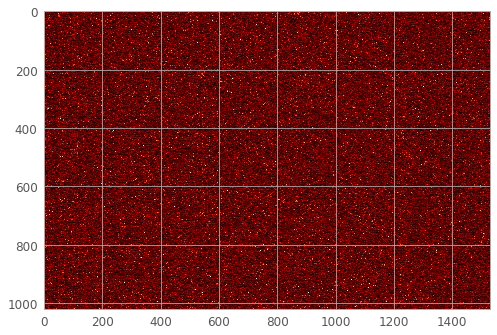

In [75]:
## plot the variance of the bias/readnoise
plt.imshow(varbias,vmin=0,vmax=np.mean(np.ravel(varbias))+3*np.std(np.ravel(varbias)))
print("The readnoise for the CCD in ADC is {:.2f}".format(np.mean(np.ravel(varbias))))

In [95]:
def get_the_av_var_for_flat(flat_0):
    flat = flat_0 - avbias
    avflat =  np.asarray(flat).mean(axis=0)
    varflat =  np.asarray(flat).var(axis=0)
    gainflat = avflat/varflat
    return avflat, varflat, gainflat

In [99]:
# choose the function to be fitted... 
def func (x,g,k):
    return x/g+k

In [102]:
def cal_gain_and_plot(avflat,varflat,gainflat):
    n, bins, _ = plt.hist(np.ravel(gainflat),100,range=(0,20))
    plt.show()
    print('The max highest histogram happens at {:.2f}.'.format(bins[np.where(n == max(n))][0]))
    ## Plot the variance versus the mean of all the pixels in the flat image
    plt.scatter(np.ravel(avflat),np.ravel(varflat))

    # ...and provide initial estimates for the parameters
    g0,k0 = (1,0.05)

    # exectute the curve fit...
    coeffs, fiterr = curve_fit(func, np.ravel(avflat), np.ravel(varflat), p0=(g0,k0))

    # ...and plot the results
    print ("g=%s" % (coeffs[0]))
    print("Therefore, the readnoise in electron is {:.3f}".format(coeffs[0]*np.mean(np.ravel(varbias))))
    plt.plot(np.ravel(avflat),func(np.ravel(avflat),*coeffs),'r.')
    plt.xlim([0,10000])
    plt.ylim([0,10000])
    plt.show()

In [100]:
## Correct the flat data with the bias data
## Calculate the mean and vairance of the flat
avflatA, varflatA, gainflatA = get_the_av_var_for_flat(flatA_0)
avflatA1, varflatA1, gainflatA1 = get_the_av_var_for_flat(flatA1_0)
avflatK, varflatK, gainflatK = get_the_av_var_for_flat(flatK_0)
avflatS, varflatS, gainflatS = get_the_av_var_for_flat(flatS_0)
avflatT, varflatT, gainflatT = get_the_av_var_for_flat(flatT_0)
avflatQ, varflatQ, gainflatQ = get_the_av_var_for_flat(flatQ_0)

## Tried the slice method
slc_flatA = flatA[:,200:500,:]
slc_avflatA =  np.asarray(slc_flatA).mean(axis=0)
slc_varflatA =  np.asarray(slc_flatA).var(axis=0)
slc_gainflatA = slc_avflatA/slc_varflatA

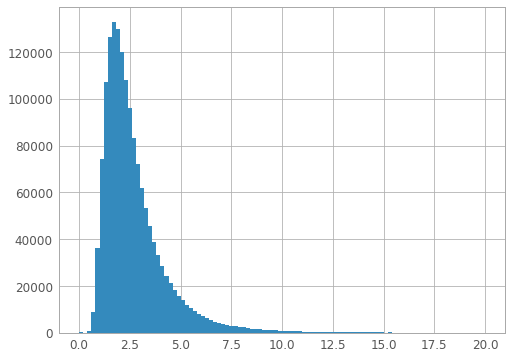

The max highest histogram happens at 1.60.
g=2.39473646544
Therefore, the readnoise in electron is 81.230


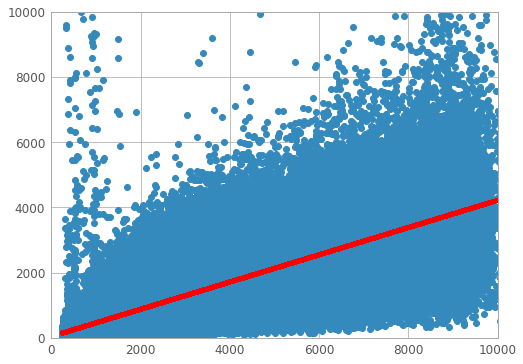

In [104]:
cal_gain_and_plot(avflatS,varflatS,gainflatS)

In [70]:
np.shape(slc_avflatA)

(300, 1530)

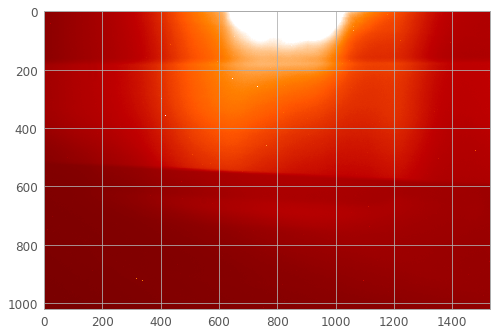

In [87]:
## plot the average flat from 90 sec
plt.imshow(avflatA,vmin=np.mean(np.ravel(avflatA))-3*np.std(np.ravel(avflatA)),vmax=np.mean(np.ravel(avflatA))+3*np.std(np.ravel(avflatA)))
plt.figure()
# plt.imshow(slc_avflatA,vmin=np.mean(np.ravel(slc_avflatA))-3*np.std(np.ravel(slc_avflatA)),vmax=np.mean(np.ravel(slc_avflatA))+3*np.std(np.ravel(slc_avflatA)))

In [88]:
## plot the histogram of the distribution of gain at integration 90s
n, bins, _ = plt.hist(np.ravel(gainflatA),100,range=(0,20))
plt.show()
print('The max highest histogram happens at {:.2f}.'.format(bins[np.where(n == max(n))][0]))

The max highest histogram happens at 2.00.


g=2.25358666116
Therefore, the readnoise in electron is 76.442


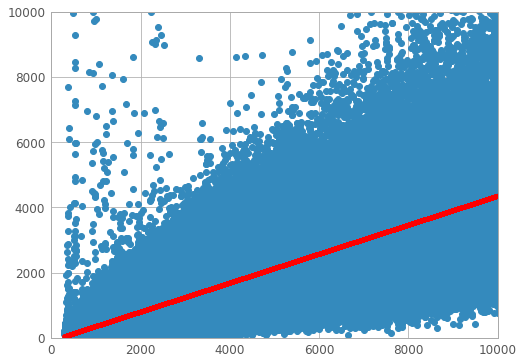

In [96]:
## Plot the variance versus the mean of all the pixels in the flat image at 90 sec
plt.scatter(np.ravel(avflatA),np.ravel(varflatA))

# choose the function to be fitted... 
def func (x,g,k):
    return x/g+k

# ...and provide initial estimates for the parameters
g0,k0 = (1,0.05)

# exectute the curve fit...
coeffs, fiterr = curve_fit(func, np.ravel(avflatA), np.ravel(varflatA), p0=(g0,k0))

# ...and plot the results
print ("g=%s" % (coeffs[0]))
print("Therefore, the readnoise in electron is {:.3f}".format(coeffs[0]*np.mean(np.ravel(varbias))))
plt.plot(np.ravel(avflatA),func(np.ravel(avflatA),*coeffs),'r.')
plt.xlim([0,10000])
plt.ylim([0,10000])
plt.show()

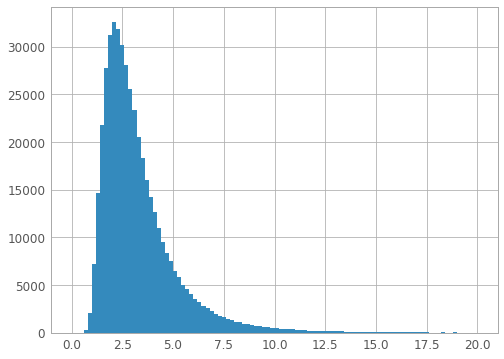

The max highest histogram happens at 2.00.


In [92]:
## plot the histogram of the distribution of gain at integration 90s with only a slice
n, bins, _ = plt.hist(np.ravel(slc_gainflatA),100,range=(0,20))
plt.show()
print('The max highest histogram happens at {:.2f}.'.format(bins[np.where(n == max(n))][0]))

g=2.59794531319


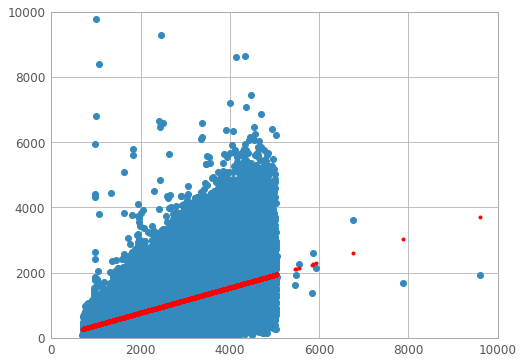

In [93]:
## Plot the variance versus the mean of all the pixels in the flat image at 90 sec with only a slice
plt.scatter(np.ravel(slc_avflatA),np.ravel(slc_varflatA))

# choose the function to be fitted... 
def func (x,g):
    return x/g

# ...and provide initial estimates for the parameters
g0 = (1)

# exectute the curve fit...
coeffs, fiterr = curve_fit(func, np.ravel(slc_avflatA), np.ravel(slc_varflatA), p0=(g0))

# ...and plot the results
print ("g=%s" % (coeffs[0]))
plt.plot(np.ravel(slc_avflatA),func(np.ravel(slc_avflatA),*coeffs),'r.')
plt.xlim([0,10000])
plt.ylim([0,10000])
plt.show()